## Keertana V. Chidambaram <br/>Computation Lab 1b - Intro to Python

### Intro to  numpy

#### Problem 1

In [1]:
import numpy as np
def fun_multiply():
    A = np.array([[3, -1, 4],[1, 5, -9]])
    B = np.array([[2, 6, -5, 3], [5, -8, 9, 7], [9, -3, -2, -3]])
    return A @ B
fun_multiply()

array([[ 37,  14, -32, -10],
       [-54,  -7,  58,  65]])

#### Problem 2

In [2]:
def cayley_hamilton():
    A = np.array([[3, 1, 4], [1, 5, 9], [-5, 3 , 1]])
    return -1 * A @ A @ A + 9 * A @ A - 15 * A
cayley_hamilton()

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

#### Problem 3

In [3]:
def array_routines():
    A = np.triu(np.ones((7, 7), dtype=np.int))
    B = np.tril(np.ones((7, 7), dtype=np.int)) * -6 + 5
    C = A @ B @ A
    C = C.astype(np.int64)
    return C
array_routines()

array([[ -7,  -8,  -3,   8,  25,  48,  77],
       [ -6, -12, -12,  -6,   6,  24,  48],
       [ -5, -10, -15, -14,  -7,   6,  25],
       [ -4,  -8, -12, -16, -14,  -6,   8],
       [ -3,  -6,  -9, -12, -15, -12,  -3],
       [ -2,  -4,  -6,  -8, -10, -12,  -8],
       [ -1,  -2,  -3,  -4,  -5,  -6,  -7]], dtype=int64)

#### Problem 4

In [4]:
def remove_neg(A):
    ind = A < 0
    B = A.copy()
    B[ind] = 0
    return B
A = np.array([-1, 0, 1, 2, -3, -4, 5])
print("B:", remove_neg(A))
print("A:", A)

B: [0 0 1 2 0 0 5]
A: [-1  0  1  2 -3 -4  5]


#### Problem 5

In [5]:
def calc_block():
    A = np.arange(6).reshape(3,2).T
    B = np.tril(np.ones((3, 3), dtype=np.int)) * 3
    C = np.eye(3)  * -2
    R1 = np.hstack((np.zeros((3,3)), A.T, np.eye(3)))
    R2 = np.hstack((A, np.zeros((2,2)), np.zeros((2,3))))
    R3 = np.hstack((B, np.zeros((3,2)), C))
    return np.vstack((R1, R2, R3))
calc_block()

array([[ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  3.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  4.,  5.,  0.,  0.,  1.],
       [ 0.,  2.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  3.,  5.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.,  0., -2., -0., -0.],
       [ 3.,  3.,  0.,  0.,  0., -0., -2., -0.],
       [ 3.,  3.,  3.,  0.,  0., -0., -0., -2.]])

#### Problem 6

In [6]:
def row_stochastic(A):
    B = A / A.sum(axis=1).reshape((2,1))
    return B
A = np.arange(6).reshape(3,2).T
row_stochastic(A)

array([[0.        , 0.33333333, 0.66666667],
       [0.11111111, 0.33333333, 0.55555556]])

#### Problem 7

In [7]:
def find_max_diag(grid):
    temp = []
    for i in range(-1 * (grid.shape[0]-1), grid.shape[1]):
        mat = grid.diagonal(i)
        if len(grid.diagonal(i)) >= 4:
            temp.append(np.max(mat[:-3] * mat[1:-2] * mat[2:-1] * mat[3:]))
    return np.max(temp)

def find_max():
    grid = np.load("grid.npy") 
    h_max = np.max(grid[:,:-3] * grid[:,1:-2] * grid[:,2:-1] * grid[:,3:])
    v_max = np.max(grid[:-3,:] * grid[1:-2,:] * grid[2:-1,:] * grid[3:,:])
    d_max = find_max_diag(grid)
    od_max = find_max_diag(np.rot90(grid))
    return max(h_max, v_max, d_max, od_max)

find_max()

70600674

### Standard Library

#### Problem 1

In [8]:
fun1 = lambda L: [min(L), max(L), sum(L) / len(L)]
L = [1, 2, 3]
fun1(L)

[1, 3, 2.0]

#### Problem 2

In [9]:
a = 1
print(type(a))
b = a
a = 7
print(a == b)
# int is immutable!

<class 'int'>
False


In [10]:
str1 = "keertana"
print(type(str1))
str2 = str1
str1 = "OSE"
print(str1 == str2)
# str is immutable!

<class 'str'>
False


In [11]:
lst1 = [1, 2, 3]
print(type(lst1))
lst2 = lst1
lst1[0] = 100
print(lst1 == lst2)
# lst is mutable!

<class 'list'>
True


In [12]:
tup1 = (10, 20)
print(type(tup1))
tup2 = tup1
tup1 = (100, 200)
print(tup1 == tup2)
# tuple is immutable!

<class 'tuple'>
False


In [13]:
set1 = {1, 2, 3}
print(type(set1))
set2 = set1
set1.add(100)
print(set1 == set2)
# set is mutable!

<class 'set'>
True


#### Problem 3

In [14]:
from calculator import *
def hypotenuse(s1, s2):
    return sqrt(sum_nums(pro_nums(s1, s1), pro_nums(s2, s2)))
hypotenuse(4, 3)

5.0

#### Problem 4

In [15]:
# Sets are mutable hence not hashable, so you cannot have set of sets
from itertools import combinations
def power_set(A):
    lst = []
    for i in range(len(A) + 1):
        for combo in list(combinations(A, i)):
            lst.append(set(list(combo)))
    return lst
A = {'a', 'b', 'c'}
print(power_set(A))

[set(), {'b'}, {'a'}, {'c'}, {'b', 'a'}, {'b', 'c'}, {'a', 'c'}, {'b', 'a', 'c'}]


#### Problem 5

In [16]:
# Solution in standard_library.py because file needs to be called from the command line

### Data Visualization

#### Problem 2

In [17]:
import  scipy.special as ss 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

def bernstein(n, v, x):
    c = ss.binom(n, v)
    return c * (x ** v) * ((1 - x) ** (n - v))

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
x = np.linspace(0, 1, 200)
for n in range(4):
    for v in range(n+1):
        plt.subplot(4, 4, (n * 4) + v + 1)
        plt.plot(x, bernstein(n, v, x), label="n,v = "+str(n)+","+str(v))
        plt.legend(loc="best")
        plt.axis([0, 1.1, 0, 1.1])

#### Problem 3

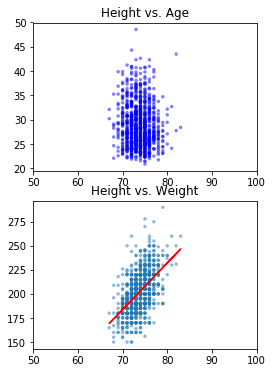

In [18]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

mlb = np.load("MLB.npy")
figure(figsize=(4, 6))

plt.subplot(2, 1, 1)
plt.scatter(mlb[:,0], mlb[:,2], alpha=.5, edgecolor='none', s=12, c='b')
plt.xlim(50, 100) 
plt.title('Height vs. Age')

plt.subplot(2, 1, 2)
plt.scatter(mlb[:,0], mlb[:,1], alpha=.5, edgecolor='none', s=12)
plt.xlim(50, 100) 
plt.title('Height vs. Weight')

slope, intercept, r_value, p_value, std_err = stats.linregress(mlb[:,0], mlb[:,1])
line = slope*mlb[:,0]+intercept
plt.plot(mlb[:,0], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.show()

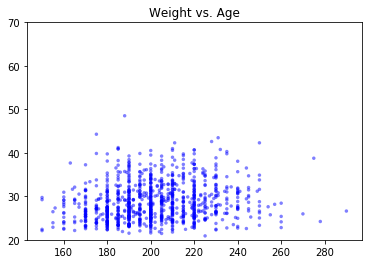

In [19]:
plt.scatter(mlb[:,1], mlb[:,2], alpha=.5, edgecolor='none', s=12, c='b')
plt.title('Weight vs. Age')
plt.ylim(20, 70)
plt.show()

#### Problem 5

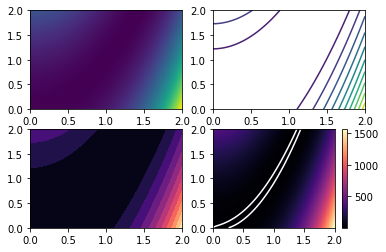

In [20]:
x = np.linspace(0, 2, 200)
X, Y = np.meshgrid(x, x)
Z = (1 - X) ** 2 + 100 * (Y - X ** 2) ** 2  #Y**2 - X**3 + X**2
fig, ax = plt.subplots(2,2)
ax[0,0].pcolormesh(X, Y, Z, cmap="viridis") # Heat map.
ax[0,1].contour(X, Y, Z, 15, cmap="viridis") # Contour map.
ax[1,0].contourf(X, Y, Z, 15, cmap="magma") # Filled contour map.
ax[1,1].contour(X, Y, Z, [1], colors="white")
cax = ax[1,1].pcolormesh(X, Y, Z, cmap="magma")
fig.colorbar(cax, ax=ax[1,1])
plt.show()

#### Problem 6

In [21]:
import pandas as  pd
data = pd.DataFrame(np.load("countries.npy"))
countries = ["Austria", "Bolivia", "Brazil", "China", "Finland", "Germany", "Hungary", "India", \
             "Japan", "North Korea", "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka", "Switzerland",\
             "Turkey", "United Kingdom", "United States", "Vietnam"]
data.index = countries
data.columns = ["pop", "gdp", "mheight", "fheight"]

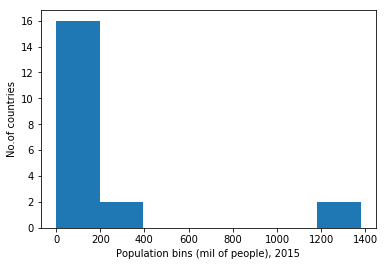

In [22]:
# Population histogram
plt.hist(data["pop"], bins=7)
plt.ylabel("No.of countries")
plt.xlabel("Population bins (mil of people), 2015")
plt.show()

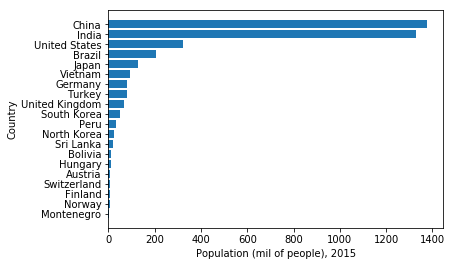

In [23]:
# Population bar chart
positions = np.arange(len(countries))
data.sort_values(by="pop", ascending=True, inplace=True)
plt.barh(positions, data["pop"], align="center")
plt.yticks(positions, data.index)
plt.ylabel("Country")
plt.xlabel("Population (mil of people), 2015")
plt.show()

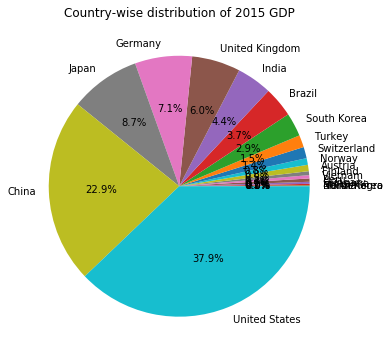

In [24]:
# GDP pie chart
figure(figsize=(6, 6))
positions = np.arange(len(countries))
data.sort_values(by="gdp", ascending=True, inplace=True)
plt.pie(data["gdp"], labels=data.index, autopct='%1.1f%%')
plt.title("Country-wise distribution of 2015 GDP")
plt.show()

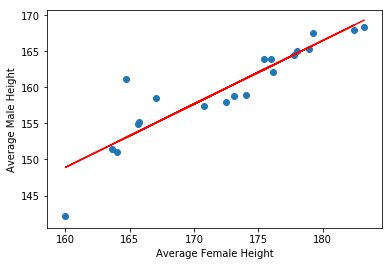

In [25]:
# Male height vs. female height scatterplot
slope, intercept, r_value, p_value, std_err = stats.linregress(data["mheight"], data["fheight"])
line = slope * data["mheight"] + intercept
plt.plot(data["mheight"], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.scatter(data["mheight"], data["fheight"])
plt.xlabel("Average Female Height")
plt.ylabel("Average Male Height")
plt.show()

### Intro to Matplotlib

#### Problem 1

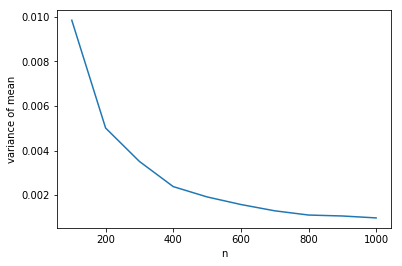

In [26]:
import numpy as np

def fun1(n):
    np.random.seed(25)
    nums = np.random.normal(size=(n, n))
    row_mean = np.sum(nums, axis=1)/n
    return np.var(row_mean)

def fun2():
    nvals = (np.arange(10) + 1) * 100
    plt.plot(nvals, [fun1(n) for n in nvals])
    plt.xlabel("n")
    plt.ylabel("variance of mean")
    plt.show

fun2()

#### Problem 2

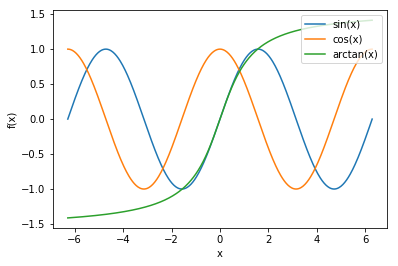

In [27]:
def fun3():
    x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
    plt.plot(x, [np.sin(i) for i in x], label="sin(x)")
    plt.plot(x, [np.cos(i) for i in x], label="cos(x)")
    plt.plot(x, [np.arctan(i) for i in x], label="arctan(x)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(loc="upper right")
    plt.show()

fun3()

#### Problem 3

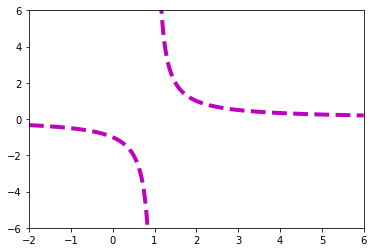

In [28]:
def f(x):
    return (1 / (x - 1))

def fun4():
    x1 = np.linspace(-2, 0.98, 300)
    x2 = np.linspace(1.02, 6, 500)
    plt.plot(x1, [f(x) for x in x1], linewidth=4, linestyle='--', c='m')
    plt.plot(x2, [f(x) for x in x2], linewidth=4, linestyle='--', c='m')
    plt.xlim([-2, 6])
    plt.ylim([-6, 6])
    plt.show()

fun4()

#### Problem 4

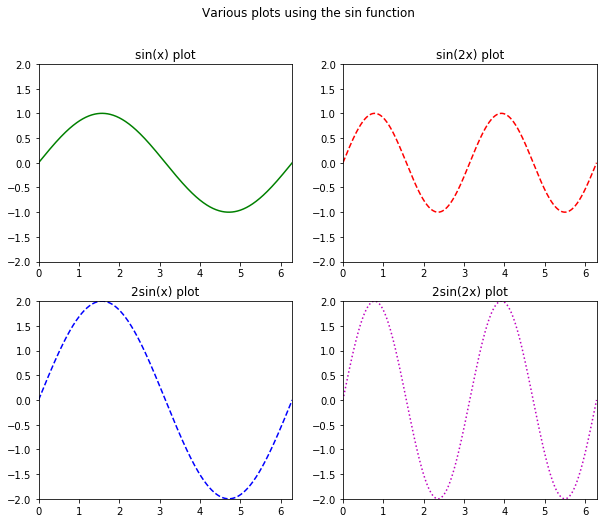

In [29]:
def fun5():
    x = np.linspace(0, 2 * np.pi, 500)
    figure(figsize=(10, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(x, [sin(i) for i in x], linestyle='-', c='g')
    plt.title("sin(x) plot")
    plt.axis([0, 2 * np.pi, -2, 2])

    plt.subplot(2, 2, 2)
    plt.plot(x, [sin(2 * i) for i in x], linestyle='--', c='r')
    plt.title("sin(2x) plot")
    plt.axis([0, 2 * np.pi, -2, 2])

    plt.subplot(2, 2, 3)
    plt.plot(x, [2 * sin(i) for i in x], linestyle='--', c='b')
    plt.title("2sin(x) plot")
    plt.axis([0, 2 * np.pi, -2, 2])

    plt.subplot(2, 2, 4)
    plt.plot(x, [2 * sin(2 * i) for i in x], linestyle=':', c='m')
    plt.title("2sin(2x) plot")
    plt.axis([0, 2 * np.pi, -2, 2])
    
    plt.suptitle("Various plots using the sin function")
    plt.show()

fun5()

#### Problem 5

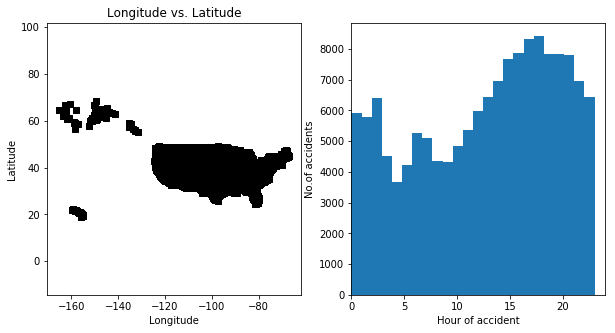

In [30]:
import pandas as  pd
data = pd.DataFrame(np.load("FARS.npy"))
data.columns = ["hour", "long", "lat"]

def fun6(data):
    figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(data["long"], data["lat"], c='black', marker=',')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Longitude vs. Latitude")
    plt.axis("equal")
    
    plt.subplot(1, 2, 2)
    plt.hist(data["hour"], bins=24)
    plt.ylabel("No.of accidents")
    plt.xlabel("Hour of accident")
    plt.xlim([0, 24])

    plt.show()

fun6(data)

### Object Oriented Programming

#### Problem 1

In [31]:
class Backpack:
    '''
    A Backpack object class. Has a name, a color, a maximum size 
    and a list of contents.

    Attributes:
    name (str): the name of the backpack's owner.
    color (str): color of the backpack.
    contents (list): the contents of the backpack.
    max_size (int): maximum size of contents in the backpack.
    '''

    def __init__(self, name, color, max_size=5):
        '''
        Set the name, color, max_size and initialize an empty list of contents.

        Parameters:
        name (str): the name of the backpack's owner.
        color (str): color of the backpack.
        max_size (int): maximum size of contents in the backpack, default=5.
        '''

        self.name = name
        self.color = color
        self.max_size = max_size
        self.contents = []
        
    def put(self, item):
        '''Add 'item' to the backpack's list of contents, if max_size has not been met.'''
        if len(self.contents) >= self.max_size:
            print("No Room!")
        else:
            self.contents.append(item)
        
    def take(self, item):
        '''Remove 'item' from the backpack's list of contents.'''
        self.contents.remove(item)
    
    def dump(self):
        '''Reset contents to an empty list.'''
        self.contents = []

def test_backpack():
    testpack = Backpack("Barry", "black") # Instantiate the object.
    if testpack.name != "Barry": # Test an attribute.
        print("Backpack.name assigned incorrectly")
    for item in ["pencil", "pen", "paper", "computer"]:
        testpack.put(item) # Test a method.
    print("Contents:", testpack.contents)
    for item in ["textbook", "phone"]:
        testpack.put(item) # Test a method.
    print("Contents:", testpack.contents)
    testpack.dump()
    print("Contents:", testpack.contents)

test_backpack()

Contents: ['pencil', 'pen', 'paper', 'computer']
No Room!
Contents: ['pencil', 'pen', 'paper', 'computer', 'textbook']
Contents: []


#### Problem 2

In [32]:
class Jetpack(Backpack):
    '''
    A Jetpack object class. Inherits from the Backpack class.
    A Jetpack contains fuel and can fly.
    Attributes:
    name (str): the name of the knapsack's owner.
    color (str): the color of the knapsack.
    max_size (int): the maximum number of items that can fit inside.
    contents (list): the contents of the backpack.
    fuel (int): amount of fuel available in the Flypack.
    '''

    def __init__(self, name, color, max_size=2, fuel=10):
        '''
        Use the Backpack constructor to initialize the name, color,
        and max_size attributes. A jetpack only holds 10 units of fuel by default.
        Parameters:
        name (str): the name of the knapsack's owner.
        color (str): the color of the knapsack.
        max_size (int): the maximum number of items that can fit inside.
        fuel (int): amount of fuel available in the Flypack.
        '''
        self.fuel = fuel
        Backpack.__init__(self, name, color, max_size)
    
    def fly(self, burn):
        '''
        Function simulating the flight of backpack by burning fuel.
        Parameters:
        burn (int): amount of fuel burnt during flight.
        '''
        if burn > self.fuel:
            print("Not enough fuel!")
        else:
            self.fuel = self.fuel - burn

    def dump(self):
        ''' Function that clears both the backpack contents and fuel. '''
        Backpack.dump()
        self.fuel = 0

#### Problem 3

In [33]:
class Backpack:
    '''
    A Backpack object class. Has a name, a color, a maximum size 
    and a list of contents.

    Attributes:
    name (str): the name of the backpack's owner.
    color (str): color of the backpack.
    contents (list): the contents of the backpack.
    max_size (int): maximum size of contents in the backpack.
    '''

    def __init__(self, name, color, max_size=5):
        '''
        Set the name, color, max_size and initialize an empty list of contents.

        Parameters:
        name (str): the name of the backpack's owner.
        color (str): color of the backpack.
        max_size (int): maximum size of contents in the backpack, default=5.
        '''

        self.name = name
        self.color = color
        self.max_size = max_size
        self.contents = []
        
    def put(self, item):
        '''Add 'item' to the backpack's list of contents, if max_size has not been met.'''
        if len(self.contents) >= self.max_size:
            print("No Room!")
        else:
            self.contents.append(item)
        
    def take(self, item):
        '''Remove 'item' from the backpack's list of contents.'''
        self.contents.remove(item)
    
    def dump(self):
        '''Reset contents to an empty list.'''
        self.contents = []
    
    def __eq__(self, other):
        ''' Function representing == operator'''
        return (self.name == other.name) and (len(self.contents) == len(other.contents))\
            and (self.color == other.color)

    def __str__(self):
        return "Owner:\t\t" + str(self.name) + "\n" + "Color:\t\t" + \
            str(self.color) + "\n" + "Size:\t\t" + str(len(self.contents)) \
            + "\n" + "Max Size:\t" + str(self.max_size) + "\n" + \
            "Contents:\t" + str(self.contents)

#### Problem 4

In [34]:
class ComplexNumber:
    ''' Class representing a complex number.'''
    def __init__(self, real, imag):
        '''
        Commplex number is initialized by specifying its real and imaginary parts.
        Parameters:
            real: real part of the commplex number.
            imag: imaginary part of the complex number.
        '''
        self.real = real
        self.imag = imag
    
    def conjugate(self):
        ''' Returns the conjugate of the complex number.'''
        return ComplexNumber(self.real, -1 * self.imag)
    
    def __str__(self):
        ''' Defines the print() representation of the complex number.'''
        if self.imag > 0: 
            return "(" + str(self.real) + "+" + str(abs(self.imag)) + "j)"
        else:
            return "(" + str(self.real) + "-" + str(abs(self.imag)) + "j)"
    
    def __abs__(self):
        ''' Returns the absolute value of the complex number.'''
        return (self.real ** 2 + self.imag ** 2) ** 0.5

    def __eq__(self, other):
        ''' Checks the equality between 2 complex number'''
        return (self.real ==  other.real) and (self.imag ==  other.imag)

    def __add__(self, other):
        ''' Adds 2 complex numbers.'''
        return ComplexNumber(self.real + other.real, self.imag + other.imag)

    def __sub__(self, other):
        ''' Subtracts one complex number from the other. '''
        return ComplexNumber(self.real - other.real, self.imag - other.imag)

    def __mul__(self, other):
        ''' Multiplies 2 complex numbers.'''
        newreal = self.real * other.real - self.imag * other.imag
        newimag = self.real * other.imag + self.imag * other.real
        return ComplexNumber(newreal, newimag)

    def __truediv__(self, other):
        ''' Divides 2 complex numbers.'''
        r = float(other.real ** 2 + other.imag ** 2)
        return ComplexNumber((self.real*other.real+self.imag*other.imag)/r, \
                       (self.imag*other.real-self.real*other.imag)/r)

def test_ComplexNumber(a, b):
    py_cnum, my_cnum = complex(a, b), ComplexNumber(a, b)
    flag = 0

    if my_cnum.real != a or my_cnum.imag != b:
        flag = 1
        print("__init__() set self.real and self.imag incorrectly")
    
    if py_cnum.conjugate().imag != my_cnum.conjugate().imag:
        flag = 1
        print("conjugate() failed for", py_cnum)
    
    if str(py_cnum) != str(my_cnum):
        flag = 1
        print("__str__() failed for", py_cnum)
    
    if abs(py_cnum) != abs(my_cnum):
        flag = 1
        print("__abs__() failed for", py_cnum)
        
    my_cnum3 = ComplexNumber(a, b)
    if my_cnum3 != my_cnum:
        flag = 1
        print("__eq__() failed for", py_cnum)
    
    py_cnum2, my_cnum2 = complex(b, a), ComplexNumber(b, a)
    if ((py_cnum2 + py_cnum).real != (my_cnum2 + my_cnum).real) or \
        ((py_cnum2 + py_cnum).imag != (my_cnum2 + my_cnum).imag):
        flag = 1
        print("__add__() failed")
    
    if ((py_cnum2 - py_cnum).real != (my_cnum2 - my_cnum).real) or \
        ((py_cnum2 - py_cnum).imag != (my_cnum2 - my_cnum).imag):
        flag = 1
        print("__sub__() failed")
    
    if ((py_cnum2 * py_cnum).real != (my_cnum2 * my_cnum).real) or \
        ((py_cnum2 * py_cnum).imag != (my_cnum2 * my_cnum).imag):
        flag = 1
        print("__mul__() failed")

    if ((py_cnum2 / py_cnum).real != (my_cnum2 / my_cnum).real) or \
        ((py_cnum2 / py_cnum).imag != (my_cnum2 / my_cnum).imag):
        flag = 1
        print("__truediv__() failed")
    
    if flag == 0:
        print("All passed!")

test_ComplexNumber(2, 3)

All passed!


### Exceptions and File Input/Output

#### Problem 1

Let the number chosen be abc = 100 * a + 10 * b + c<br/> 
Reversing you get 100 * c + 10 * b + a.<br/> 
Subtracting and taking absolute value you get 99 * abs(c - a),<br/>
Where, abs(c-a) is a number between 2 and 9.<br/>
99 * d + reverse of (99 * d) = 1089 for all 2<=d<=9.<br/>
Hence we get the same results regardless of the initial number chosen!

In [35]:
def check_reverse(num1, num2):
    a = int(num1) // 100
    c = int(num1) % 10 
    b = (int(num1) % 100) // 10
    a2 = int(num2) // 100
    c2 = int(num2) % 10 
    b2 = (int(num2) % 100) // 10
    if (a2 != c) or (b2 != b) or (c2 != a):
        raise ValueError("Number not reverse of previous!!")
    return
    
def arithmagic():
    step_1 = input("Enter a 3-digit number where the first and last "
    "digits differ by 2 or more: ")
    if len(step_1) != 3:
        raise ValueError("Not a 3 digit number!!")
    a = int(step_1) // 100
    b = int(step_1) % 10 
    
    if abs(a - b) < 2:
        raise ValueError("First and last digits differ by less than 2!!")
        
    step_2 = input("Enter the reverse of the first number, obtained "
    "by reading it backwards: ")
    check_reverse(step_1, step_2)
    
    step_3 = input("Enter the positive difference of these numbers: ")
    if abs(int(step_1) - int(step_2)) != int(step_3):
        raise ValueError("Third number not positive difference of first 2!!")
    
    step_4 = input("Enter the reverse of the previous result: ")
    check_reverse(step_3, step_4)
    
    print(str(step_3), "+", str(step_4), "= 1089 (ta-da!)")

#### Problem 2

In [ ]:
from random import choice

def random_walk(max_iters=1e12):
    flag = 1
    walk = 0
    directions = [1, -1]
    for i in range(int(max_iters)):
        try:
            walk += choice(directions)
        except KeyboardInterrupt as c:
            print("Process interrupted at iteration", i)
            flag = 0
            break
    if flag:
        print("Process completed")
    return walk
random_walk()

#### Problem 3

In [53]:
class ContentFilter:
    def __init__(self, filename):
        while 1:
            try:
                myfile = open(filename, 'r')
            except OSError as e:
                filename = input("Please enter a valid file name:")
            else:
                break
        self.name = filename
        with open(self.name, 'r') as myfile:
            self.contents = myfile.readlines()

#### Problem 4

In [139]:
class ContentFilter:
    def __init__(self, filename):
        while 1:
            try:
                myfile = open(filename, 'r')
            except OSError as e:
                filename = input("Please enter a valid file name:")
            else:
                break
        self.filename = filename
        with open(self.filename, 'r') as myfile:
            self.contents = myfile.readlines()
            
    def uniform(self, filename, mode='w', case='upper'):
        if mode not in ['w', 'x', 'a']:
            raise ValueError('Mode value is invalid!!')
            return
        if case not in ['upper', 'lower']:
            raise ValueError('Case value is invalid!!')
            return
        with open(filename, mode) as f:
            for i in self.contents:
                if case == 'lower':
                    f.write(i.lower())
                else:
                    f.write(i.upper())
            f.write('\n')

    def reverse(self, filename, mode, unit='line'):
        if mode not in ['w', 'x', 'a'] :
            raise ValueError('Mode of writing to file is not valid!!')
            return
        if unit not in ['line', 'word']:
            raise ValueError('Unit value is invalid!!')
            return
        with open(filename, mode) as f:
            if unit == 'line':
                for i in self.contents[::-1]:
                    f.write(i.strip()+'\n')
            else:
                for i in self.contents:
                    for j in i.strip().split()[::-1]:
                        f.write(j + ' ')
                    f.write('\n')

    def transpose(self, filename, mode='w'):
        if mode not in ['w', 'x', 'a'] :
            raise ValueError('Mode of writing to file is not valid!!')
            return
        transpose = []
        for i in self.contents:
            for j in range(len(i.split())):
                try:
                    transpose[j] = transpose[j] + ' ' + i.split()[j]
                except IndexError:
                    transpose.append(i.split()[j])
        with open(filename, mode) as f:
            f.writelines([i + '\n' for i in transpose])
    
    def __str__(self):
        alpha = [[j for j in i if j.isalpha()] for i in a.contents]
        num = [[j for j in i if j.isdigit()] for i in a.contents]
        space = [[j for j in i if j.isspace()] for i in a.contents]
        
        ret =   'Source file:\t\t' + str(self.filename) + '\n' +\
                'Total characters\t' + str(sum([len(i) for i in self.contents])) + '\n' +\
                'Alphabetic characters:\t' + str(sum([len(k) for k in alpha])) + '\n' +\
                'Numerical characters:\t' + str(sum([len(k) for k in num])) + '\n' +\
                'Whitespace characters:\t' + str(sum([len(k) for k in space])) + '\n' +\
                'Number of lines:\t' + str(len(self.contents))

# Test Codes
cf = ContentFilter("cf_example1.txt")
cf.uniform("uniform.txt", mode='w', case="upper")
cf.uniform("uniform.txt", mode='a', case="lower")
cf.reverse("reverse.txt", mode='w', unit="word")
cf.reverse("reverse.txt", mode='a', unit="line")
cf.transpose("transpose.txt", mode='w') 